<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import matplotlib.pyplot as plt
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip
from nomeroff_net.pipes.number_plate_classificators.options_detector import CLASS_REGION_ALL

In [8]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", 
                                              # setup ocrs (presets key is detector file name in dir ./nomeroff_net/text_detectors/ )
                                              presets={
                                                "ru": {
                                                    "for_regions": CLASS_REGION_ALL,
                                                    "model_path": "latest"
                                                },
                                              },
                                              default_label="ru",
                                              default_lines_count=1,
                                              # if you not need detect region or count lines
                                              off_number_plate_classification=True,
                                              image_loader="opencv")

Loading weights from checkpoint (/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/np_points_craft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/np_points_craft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [9]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/20190525.jpg'),
])

In [10]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['M556BX159']


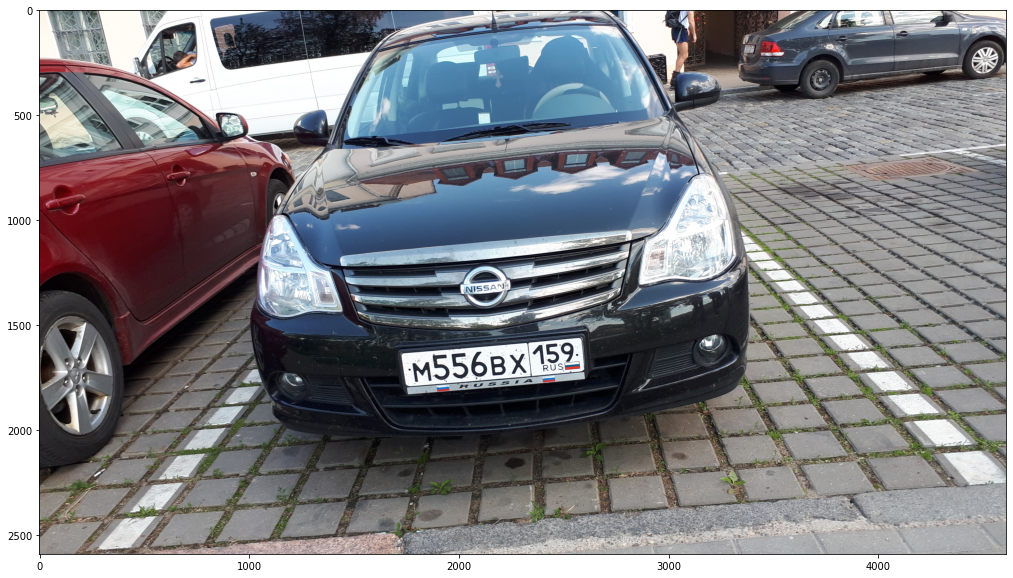

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, np in zip(images, texts):
    print(np)
    plt.imshow(img)
    plt.show()